## Программирование для всех (основы работы в Python)

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой HTML-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм pandas, чтобы потом сохранить всё в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [2]:
import requests

Возьмём ссылку на главную страницу сайта и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [3]:
page = requests.get("https://nplus1.ru/") 

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [5]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию BeautifulSoup из библиотеки `bs4` (от `beautifulsoup4`) и заберём со страницы `page` код `html` в виде строки.

In [6]:
from bs4 import BeautifulSoup

In [7]:
soup = BeautifulSoup(page.text)

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме просмотра исходного кода страницы (*view-source* через *Ctrl+U* в Google Chrome).

In [ ]:
soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [ ]:
print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [8]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/bookshelf
/theme/nobelprize
/theme/Courses
/theme/coronavirus-history
/theme/offline
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/bookshelf
/theme/nobelprize
/theme/Courses
/theme/coronavirus-history
/theme/offline
https://nplus1.ru/blog/2021/10/12/sodom-wasnt-bombed
https://nplus1.ru/blog/2021/10/12/sodom-wasnt-bombed
https://nplus1.ru/blog/2021/10/07/the-inside-story-on-headaches
https://nplus1.ru/blog/2021/10/05/in-search-of-memory
https://nplus1.ru/blog/2021/09/30/breaking-the-maya-code
https://nplus1.ru/blog/2021/09/28/unsere-welt-neu-denken
https://nplus1.ru/blog/2021/09/27/Its-The-end-of-the-world
https://nplus1.ru/blog/2021/09/23/cosmological-koans
https://nplus1.ru/blog/2021/09/21/the-French-Revolution
https://nplus1.ru/blog/2021/09/16/lone-survivors
https://nplus1.ru/blog/2021/10/20/six-impossible-things
/news/2021/10/21/j6
/news/2021/10/21/decoration

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `links` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [9]:
links = []
for link in soup.find_all("a"):
    if "/news" in link.get("href"):
        links.append(link.get("href")) 

Ссылки, которые у нас есть в списке `links`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [10]:
full_links = ["https://nplus1.ru" + i for i in links] 

In [11]:
for i in full_links:
    print(i)

https://nplus1.ru/news/2021/10/21/j6
https://nplus1.ru/news/2021/10/21/decorations
https://nplus1.ru/news/2021/10/21/ay42
https://nplus1.ru/news/2021/10/21/alemannic-burial
https://nplus1.ru/news/2021/10/21/ardenna-pacifica
https://nplus1.ru/news/2021/10/20/sound-magnetic-field-mercury
https://nplus1.ru/news/2021/10/20/msu-quadruped
https://nplus1.ru/news/2021/10/20/homeland-horse
https://nplus1.ru/news/2021/10/20/viking-america
https://nplus1.ru/news/2021/10/20/ebikes
https://nplus1.ru/news/2021/10/20/loss-smell-bad-bell
https://nplus1.ru/news/2021/10/20/cosi
https://nplus1.ru/news/2021/10/20/air
https://nplus1.ru/news/2021/10/20/starline-cargo
https://nplus1.ru/news/2021/10/20/gmo-pig-kidney
https://nplus1.ru/news/2021/10/20/e-cigarettes
https://nplus1.ru/news/2021/10/20/roman-coin
https://nplus1.ru/news/2021/10/20/atomic-3d-scanner
https://nplus1.ru/news/2021/10/20/criosphinxes
https://nplus1.ru/news/2021/10/12/black-mesa
https://nplus1.ru/news/2021/10/14/TSSA
https://nplus1.ru/news

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_links` в цикле. Посмотрим на новость с индексом 2, у вас может быть другая, новости обновляются.

In [12]:
url0 = full_links[2]
page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text)

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [13]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>,
 <meta content="2021-10-21" itemprop="datePublished"/>,
 <meta content="Анастасия Кузнецова" name="mediator_author"/>,
 <meta content="Он может быть на 10 процентов более заразнее" name="description"/>,
 <meta content="Анастасия Кузнецова" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="В России выявили первые случаи заражения штаммом коронавируса AY.4.2" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2021/10/21/735341fd631676f2d32272e8caf69029.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2021/10/21/ay42" property="og:url"/>,
 <meta content="Он может быть на 10 проце

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим методу `.find_all()` в качестве аргумента словарь с названием и значением атрибута:

In [15]:
# например, автор
soup0.find_all("meta", {"name" : "mediator_author"})

[<meta content="Анастасия Кузнецова" name="mediator_author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [16]:
soup0.find_all("meta", {"name" : "mediator_author"})[0]

<meta content="Анастасия Кузнецова" name="mediator_author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [17]:
soup0.find_all("meta", {"name" : "mediator_author"})[0].attrs

{'name': 'mediator_author', 'content': 'Анастасия Кузнецова'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [18]:
author = soup0.find_all("meta", 
                        {"name" : "mediator_author"})[0].get("content")
author

'Анастасия Кузнецова'

Аналогичным образом извлечем заголовок и описание.

In [19]:
title = soup0.find_all("meta", 
                      {"property" : "og:title"})[0].get("content")
desc = soup0.find_all("meta", 
                        {"name" : "description"})[0].get("content")

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>` с классом `table`:

In [20]:
tables = soup0.find_all("p", {"class": "table"})
tables

[<p class="table">
 <a data-rubric="medicine" href="/rubric/medicine">Медицина</a>
 <a data-theme="coronavirus-history" href="/theme/coronavirus-history">Коронавирусные хроники</a>
 </p>, <p class="table">
 <a href="/news/2021/10/21">
 <time content="2021-10-21" data-unix="1634801188" itemprop="datePublished">
 <span>10:26</span>
 <span>21 Окт. 2021</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/1.5">
 <span>Сложность</span>
 <span class="difficult-value">1.5</span>
 </a>
 </p>]

Получили список из трёх разных табличек. Сохраним элементы списка в отдельные переменные:

In [21]:
tab_rubrics, tab_time, tab_diff = tables

Поработаем с рубриками. Найдём все кусочки с тэгами `<a></a>`, а затем из каждого извлечём текст (текст ссылки, который записан внутри тэгов):

In [22]:
rubr_raw = tab_rubrics.find_all("a")
rubrics = [i.text for i in rubr_raw]
rubrics

['Медицина', 'Коронавирусные хроники']

Аналогичным образом обработаем `tab_time` и извлечём текст с временем и датой:

In [23]:
time = tab_time.find_all("span")[0].text
date = tab_time.find_all("span")[1].text

Внутри `tab_diff` скрыта более сложная структура – нужно найти `span` с определённым значением атрибута `class`:

In [24]:
diffc = tab_diff.find_all("span", {"class" : "difficult-value"})[0].text
diffc

'1.5'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class` (иначе мы соберём слишком много ненужной информации):

In [25]:
parts = soup0.find_all("p", {"class" : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [26]:
parags = [i.text for i in parts]

Склеим все элементы списка text через пробел:

In [27]:
text = " ".join(parags)
text

'В\xa0России выявили первые случаи заражения новым вариантом дельта-штамма коронавируса AY.4.2. Об\xa0этом сообщила пресс-служба Роспотребнадзора. В\xa0ведомстве считают, что новый вариант может быть на\xa010\xa0процентов более заразным, но\xa0при этом не\xa0будет вызывать более тяжелого заболевания, а\xa0вакцины против него останутся эффективными. Дельта-вариант\nкоронавируса, по\xa0словам ВОЗ, окончательно вытеснил все\nостальные штаммы и\xa0теперь доминирует по\xa0всему миру. Приобретенные мутации дали дельта-варианту\nпреимущества\xa0— он\xa0заразнее предшественников, а\xa0антителам вакцинированных и\nпереболевших сложнее его нейтрализовать. Подробнее об\xa0этом штамме коронавируса\nможно почитать в\xa0нашем материале От\xa0«альфы» до\xa0«дельты». Эволюция\nкоронавируса, в\xa0том числе и\xa0самого дельта-штамма, продолжается. Мы\xa0уже писали о\nновом его варианте\xa0— дельта-плюс, который появился в\xa0России в\xa0конце июня 2021\nгода. Дельта-плюс отличается от\xa0дельты мутацией

Осталось только заменить непонятные символы `\xa0` на пробелы (на самом деле это неразрывные пробелы, которые в HTML кодируются специальным символом):

In [28]:
text = text.replace("\xa0", " ")

Давайте почистим текст новостей – уберём оттуда текст, не относящийся к новостям. Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать всё, что до неё (элемент с индексом 0).

In [29]:
text_final = text.split("Нашли опечатку?")[0]

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_links`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [30]:
def get_info(url0):
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text)
    author = soup0.find_all("meta", 
                        {"name" : "mediator_author"})[0].get("content")
    title = soup0.find_all("meta", 
                          {"property" : "og:title"})[0].get("content")
    desc = soup0.find_all("meta", 
                            {"name" : "description"})[0].get("content")
    tables = soup0.find_all("p", {"class": "table"})
    tab_rubrics, tab_time, tab_diff = tables
    rubr_raw = tab_rubrics.find_all("a")
    rubrics = [i.text for i in rubr_raw]
    time = tab_time.find_all("span")[0].text
    date = tab_time.find_all("span")[1].text
    diffc = tab_diff.find_all("span", {"class" : "difficult-value"})[0].text
    parts = soup0.find_all("p", {"class" : None})
    parags = [i.text for i in parts]
    text = " ".join(parags)
    text = text.replace("\xa0", " ")
    text_final = text.split("Нашли опечатку?")[0]
    return author, title, desc, rubrics, time, date, diffc, text_final

Проверим функцию на какой-нибудь ссылке (не той, с которой работали ранее):

In [31]:
get_info(full_links[5])

('Александр Войтюк',
 '«БепиКоломбо» услышал «пение» магнитосферы Меркурия',
 'А также оценил состав экзосферы планеты',
 ['Космонавтика', 'Звук'],
 '19:56',
 '20 Окт. 2021',
 '3.2',
 'Команда межпланетной станции «БепиКоломбо» опубликовали научные данные, собранные во время первого гравитационного маневра у Меркурия. Научные приборы за время сближения оценили состав экзосферы планеты, записали «пение» магнитосферы Меркурия и зафиксировали потоки нейтронов и гамма-квантов с поверхности планеты, сообщается на сайте ESA. Меркурий — одна из самых малоисследованных планет Солнечной системы. За всю историю космонавтики к нему летали лишь два аппарата, а третья миссия — «БепиКоломбо» — стартовала три года назад. Она состоит из европейского аппарата MPO (Mercury Planetary Orbiter), японского MMO (Mercury Magnetospheric Orbiter) и перелетного модуля MTM. Ожидается, что в декабре 2025 года аппараты выйдут на рабочие полярные орбиты вокруг Меркурия и начнут изучение его поверхности и внутренней 

Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, если будем обсуждать встраивание в браузер с Selenium). Приступим.

In [32]:
from time import sleep

In [34]:
info = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_links:
    res = get_info(link)
    info.append(res)
    sleep(1.5) # задержка в 1.5 секунды

In [36]:
info[0]

('Василиса Чернявцева',
 'Китай переделал советские истребители в беспилотники',
 'В сети появились фотографии беспилотников, переделанных из китайских истребителей J-6 — китайской копии МиГ-19',
 ['Авиация', 'Оружие'],
 '12:33',
 '21 Окт. 2021',
 '2.8',
 ' В сети появились фотографии беспилотников, переделанных из китайских истребителей J-6 — китайской копии МиГ-19. Как сообщает Defense News, их изначально опубликовало командование восточного военного округа КНР.  J-6 — это китайская копия самолета МиГ-19, первого серийного сверхзвукового истребителя в СССР. При размахе крыла в 9,2 метра его длина — 12,5 метра. Максимальный взлетный вес J-6 составляет 8,8 тонны, при этом самолет может нести до 3,75 тонны полезной нагрузки. Истребитель может летать с крейсерской скоростью 830 узлов на расстояния до 2,2 тысячи километров.  J-6 официально вышли из состава ВВС Народно-освободительной армии Китая в 2010 году, но продолжали появляться на спутниковых снимках с двух авиабаз неподалеку от Тайв

Импортируем pandas и создадим датафрейм из списка кортежей:

In [37]:
import pandas as pd

In [38]:
df = pd.DataFrame(info)

In [39]:
df.head(3)

,0,1,2,3,4,5,6,7
0,Василиса Чернявцева,Китай переделал советские истребители в беспил...,"В сети появились фотографии беспилотников, пер...","[Авиация, Оружие]",12:33,21 Окт. 2021,2.8,"В сети появились фотографии беспилотников, пе..."
1,Михаил Подрезов,В Баварии нашли останки раннесредневековой мод...,Археологи провели раскопки некрополя в окрестн...,"[Археология, Антропология]",11:45,21 Окт. 2021,2.9,Немецкие археологи раскопали раннесредневековы...
2,Анастасия Кузнецова,В России выявили первые случаи заражения штамм...,Он может быть на 10 процентов более заразнее,"[Медицина, Коронавирусные хроники]",10:26,21 Окт. 2021,1.5,В России выявили первые случаи заражения новым...


Переименуем столбцы в датафрейме.

In [40]:
df.columns = ["author", "title", "description", "rubrics", 
              "time", "date", "difficulty", "text"]

In [41]:
df.head(3)

,author,title,description,rubrics,time,date,difficulty,text
0,Василиса Чернявцева,Китай переделал советские истребители в беспил...,"В сети появились фотографии беспилотников, пер...","[Авиация, Оружие]",12:33,21 Окт. 2021,2.8,"В сети появились фотографии беспилотников, пе..."
1,Михаил Подрезов,В Баварии нашли останки раннесредневековой мод...,Археологи провели раскопки некрополя в окрестн...,"[Археология, Антропология]",11:45,21 Окт. 2021,2.9,Немецкие археологи раскопали раннесредневековы...
2,Анастасия Кузнецова,В России выявили первые случаи заражения штамм...,Он может быть на 10 процентов более заразнее,"[Медицина, Коронавирусные хроники]",10:26,21 Окт. 2021,1.5,В России выявили первые случаи заражения новым...


Теперь внесем изменения: сделаем столбец `difficulty` числовым – типа `float`.

In [44]:
df['difficulty'] = df['difficulty'].astype(float)

Теперь сложность представлена как количественный показатель, и описывать её можно соответствующим образом:

In [45]:
df["difficulty"].describe()

count    28.000000
mean      4.060714
std       2.267866
min       1.500000
25%       2.375000
50%       3.000000
75%       5.650000
max       8.700000
Name: difficulty, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

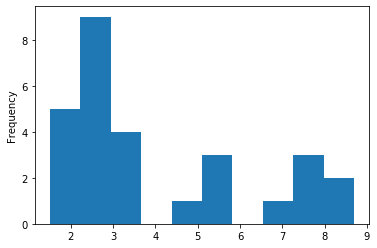

In [46]:
%matplotlib inline
df["difficulty"].plot.hist()

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [47]:
df.to_excel('nplus1-news.xlsx')